In [42]:
import torch
from pretrain.YOLO_Feature import YOLO_Feature

In [43]:
yolo_feature = YOLO_Feature()
pretrain_dict = torch.load('weights/YOLO_Feature_120.pth', map_location='cpu')
yolo_feature.load_state_dict(pretrain_dict['model'])

<All keys matched successfully>

In [44]:
txt_path = '../data/coco2017/class.txt'
with open(txt_path, 'r') as f:
    classes = f.read().strip().split('\n')

sample_name = []
for class_name in classes:
    name = class_name.split(' ')[1]
    sample_name.append(name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 6,  0, 60])
tensor([ 6,  0, 60])


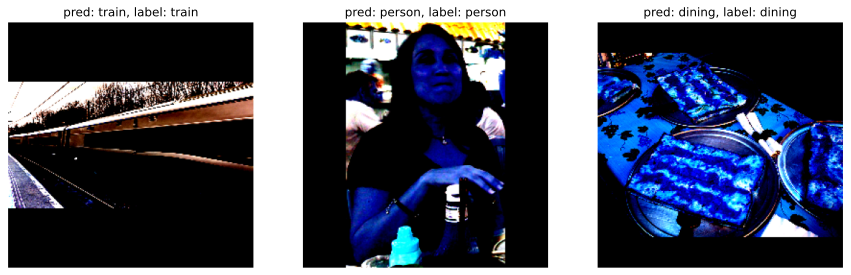

In [53]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
import IPython.display as display

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import torch.utils
from data_process.COCO_DataSet import *

train_dataSet = coco_classify_dataset(imgs_path='../data/coco2017/Train/Imgs',txts_path='../data/coco2017/Train/Labels', is_train=False, edge_threshold=200)
train_iter = torch.utils.data.DataLoader(train_dataSet, batch_size=3, shuffle=True, num_workers=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def show_img(img, ax, pred=None, lable=None):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'pred: {pred}, label: {lable}')

for i, (x, y) in enumerate(train_iter):
    pred = yolo_feature(x)
    y_hat = torch.argmax(pred, dim=1)
    print(y_hat)
    print(y)
    for j in range(3):
        show_img(x[j].permute(1, 2, 0).numpy(), axes[j], sample_name[y_hat[j].item()], sample_name[y[j].item()])
    break

